# Prepare my own Dataset

[download data here](https://www.kaggle.com/c/dogs-vs-cats/data)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import re
import shutil
import os
%matplotlib inline

tf_keras = tf.contrib.keras

## Separate Cat and Dog Images

In [3]:
def get_cat_and_dog_files(data):

    cat_files = []
    dog_files = []

    for string in data:
        # file example: '../data/train/cat.10005.jpg'
        result = re.search("\/([a-z]+)\.", string)

        if result is not None:
            if result.group(1) == "cat":
                cat_files.append(string)
            elif result.group(1) == "dog":
                dog_files.append(string)
        else:
            print("ERROR: can't find a match for: {}".format(string))
    return cat_files, dog_files       

# Dataset size

In [17]:
dataset_path = "data/train/*.jpg"
data = glob.glob(dataset_path)
print(data)
print("{} images found:".format(len(data)))

cat_files, dog_files = get_cat_and_dog_files(data)

print("{} cat images".format(len(cat_files)))
print("{} dog images".format(len(dog_files)))


['data/train/cat.9222.jpg', 'data/train/cat.9554.jpg', 'data/train/cat.2074.jpg', 'data/train/cat.8976.jpg', 'data/train/dog.7298.jpg', 'data/train/dog.125.jpg', 'data/train/cat.9383.jpg', 'data/train/cat.5213.jpg', 'data/train/cat.940.jpg', 'data/train/cat.5187.jpg', 'data/train/dog.7029.jpg', 'data/train/dog.4039.jpg', 'data/train/dog.302.jpg', 'data/train/cat.2670.jpg', 'data/train/cat.4194.jpg', 'data/train/cat.2932.jpg', 'data/train/cat.6042.jpg', 'data/train/dog.673.jpg', 'data/train/dog.3214.jpg', 'data/train/dog.239.jpg', 'data/train/dog.8298.jpg', 'data/train/cat.5110.jpg', 'data/train/cat.3560.jpg', 'data/train/cat.7188.jpg', 'data/train/cat.5653.jpg', 'data/train/dog.8256.jpg', 'data/train/cat.6820.jpg', 'data/train/cat.12027.jpg', 'data/train/dog.11034.jpg', 'data/train/cat.10100.jpg', 'data/train/cat.9696.jpg', 'data/train/dog.10439.jpg', 'data/train/dog.1623.jpg', 'data/train/cat.9434.jpg', 'data/train/dog.2098.jpg', 'data/train/dog.6498.jpg', 'data/train/dog.11871.jpg', 

# Visualize Dataset

In [8]:
def plot_image_grid(images_files):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    # here each 'img'is actually image file path
    images = [tf_keras.preprocessing.image.load_img(img) for img in images_files]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

# Cat Sample Images

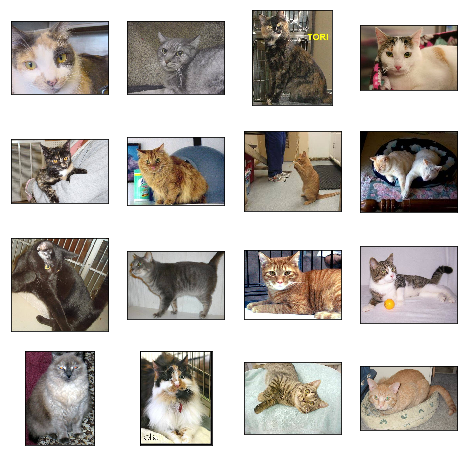

In [19]:
plot_image_grid(cat_files[:16])

# Dog Sample Images

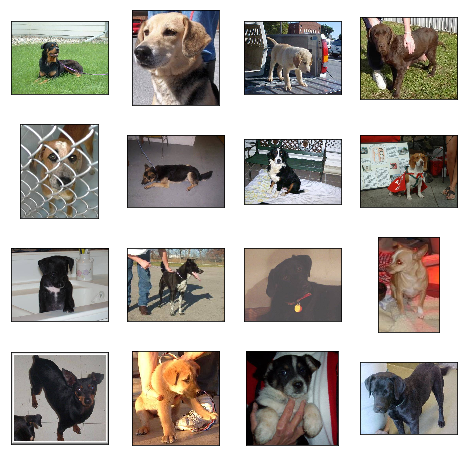

In [10]:
plot_image_grid(dog_files[:16])

# Split Dataset Into Train and Test Set

In [13]:
def train_test_split(cat_files, dog_files):
    train_cat_files = cat_files[:10000]
    test_cat_files = cat_files[10000:]

    train_dog_files = dog_files[:10000]
    test_dog_files = dog_files[10000:]

    print("train size: {} cats and {} dogs".format(len(train_cat_files), len(train_dog_files)))
    print("test size :  {} cats and  {} dogs".format(len(test_cat_files), len(test_dog_files)))
    
    return train_cat_files, test_cat_files, train_dog_files, test_dog_files

In [14]:
train_test_files = train_test_split(cat_files, dog_files)

train size: 10000 cats and 10000 dogs
test size :  2500 cats and  2500 dogs


# Save Train Test Split to New Directory

In [15]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)

# combine all the dataset preparation steps into one function
def prepare_cat_dog_dataset(dataset_path):
    train_cat_dir = "data/training/cat/"
    train_dog_dir = "data/training/dog/"
    test_cat_dir = "data/testing/cat/"
    test_dog_dir = "data/testing/dog/"

    print("Load images...")
    data = glob.glob(dataset_path)
    print("{} images found".format(len(data)))

    print("\nSeperate cat images from dog images")
    cat_files, dog_files = get_cat_and_dog_files(data)

    print("\nSplit train and test dataset")
    train_cat_files, test_cat_files, train_dog_files, test_dog_files = train_test_split(cat_files, dog_files)

    print("\nCopying train cat images to new directory...")
    copy_files_to_directory(train_cat_files, train_cat_dir)

    print("\nCopying test cat images to new directory...")
    copy_files_to_directory(test_cat_files, test_cat_dir)

    print("\nCopying train dog images to new directory...")
    copy_files_to_directory(train_dog_files, train_dog_dir)

    print("\nCopying test cat images to new directory...")
    copy_files_to_directory(test_dog_files, test_dog_dir)

In [16]:
dataset_path = "data/train/*.jpg"
prepare_cat_dog_dataset(dataset_path)

Load images...
25000 images found

Seperate cat images from dog images

Split train and test dataset
train size: 10000 cats and 10000 dogs
test size :  2500 cats and  2500 dogs

Copying train cat images to new directory...
Created directory: data/training/cat/

Copying test cat images to new directory...
Created directory: data/testing/cat/

Copying train dog images to new directory...
Created directory: data/training/dog/

Copying test cat images to new directory...
Created directory: data/testing/dog/
